In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [3]:
camp_data = pd.read_csv('bank_data.csv')

In [4]:
camp_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
# dropping unnecessary columns
camp_data.drop(['pdays', 'previous', 'poutcome', 'day'], axis = 1, inplace = True)

<h2>Understanding the dataset</h2>

In [6]:
camp_data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,may,1042,1,yes


In [7]:
camp_data.shape

(11162, 13)

In [8]:
camp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  deposit    11162 non-null  object
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [9]:
camp_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
month        0
duration     0
campaign     0
deposit      0
dtype: int64

In [10]:
camp_data.describe()

,age,balance,duration,campaign
count,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421
std,11.913369,3225.413326,347.128386,2.722077
min,18.000000,-6847.000000,2.000000,1.000000
25%,32.000000,122.000000,138.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000
75%,49.000000,1708.000000,496.000000,3.000000
max,95.000000,81204.000000,3881.000000,63.000000


In [11]:
# We can easily spot that there are outliers in campaign and duration from the above describtion 
len(camp_data[camp_data['duration'] > 1900]) / len(camp_data['duration']) * 100 , len(camp_data[camp_data['campaign'] > 20]) / len(camp_data['campaign']) * 100, len(camp_data[camp_data['balance'] > 25000]) / len(camp_data['balance']) * 100

(0.3941945887833721, 0.3762766529295825, 0.250851101953055)

### What is the structure of your dataset?

There are 11162 bank clients in this campaign with 13 different information we have about them (Aga, Job, Marital, Education,
Default, Housing Loans, Personal Loans, Device used for contact, Balance in their account, Month of contact, Contacts per Campaign and duration of contact). 
Most of the variables are Categorical except these four (age, balance, campaign, duration).
Variable "deposit" indicates whether the client subscribed -yes- or did not subscribe -no-

### What is/are the main feature(s) of interest in your dataset?

I am most interested in finding what factors increases the chances of a client subscribing to the bank's term deposit; in order to improve the targeting and performance of future campaigns.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect features like age, balance, marital status and number of times the client contacted will have great influence on the client's final decision.

<h2>Univariate Exploration</h2>

Qualitative Variables

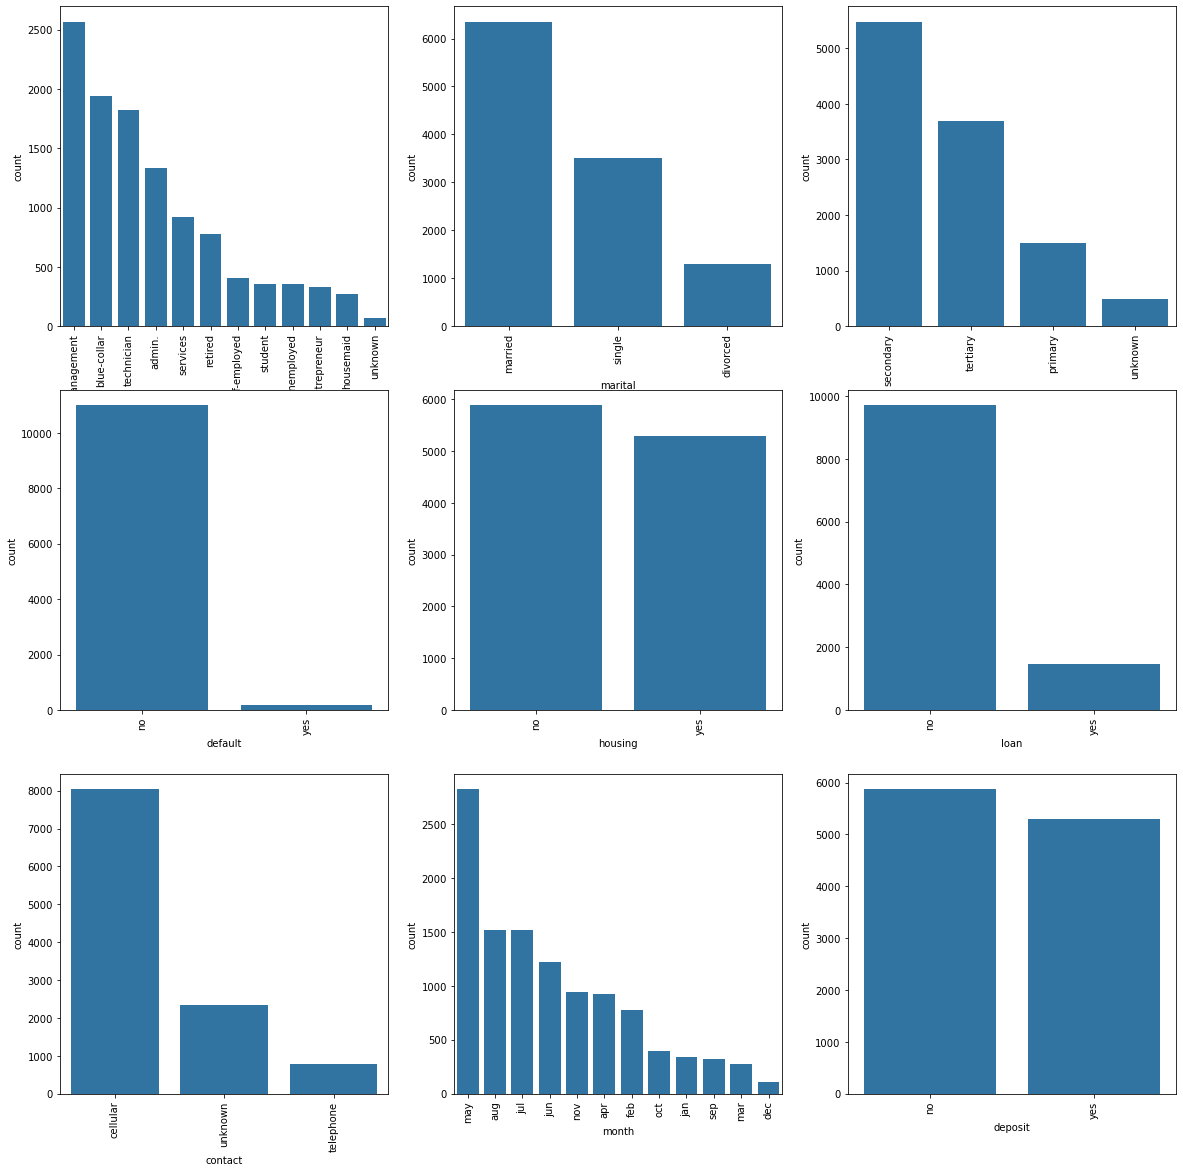

In [12]:
base_color = sb.color_palette()[0]
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'deposit']
i = 1
plt.figure(figsize = (20,20))
for col in cols:
        plt.subplot(3,3,i)
        freq = camp_data[col].value_counts()
        order = freq.index
        sb.countplot(data = camp_data, x = col, color = base_color, order = order)
        plt.xticks(rotation = 90);
        i = i+1

Quantitative Variables

(0.0, 25000.0)

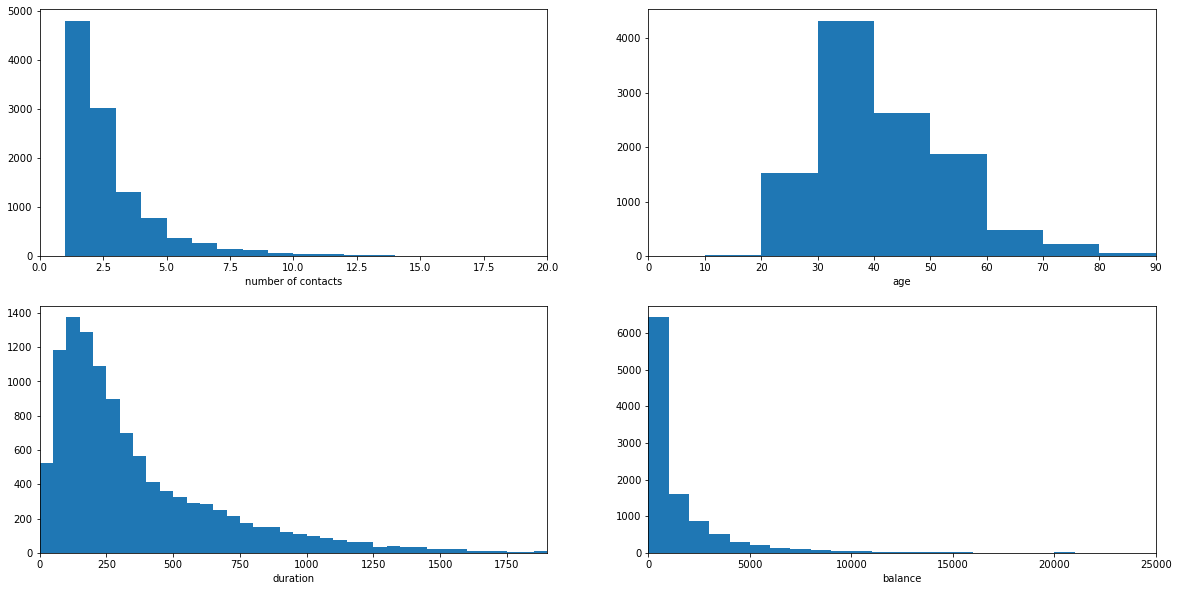

In [13]:
plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
bins = np.arange(0, 20, 1)
plt.hist(data = camp_data, x = 'campaign', bins = bins);
plt.xlim(0,20)
plt.xlabel('number of contacts')

plt.subplot(2,2,2)
bins = np.arange(0, camp_data['age'].max() + 10, 10)
plt.hist(data = camp_data, x = 'age', bins = bins)
plt.xlim(0,90)
plt.xlabel('age')

plt.subplot(2,2,3)
bins = np.arange(0, camp_data['duration'].max() + 50, 50)
plt.hist(data = camp_data, x = 'duration', bins = bins)
plt.xlim(0,1900);
plt.xlabel('duration');

plt.subplot(2,2,4)
bins = np.arange(0, camp_data['balance'].max() + 1000, 1000)
plt.hist(data = camp_data, x = 'balance', bins = bins)
plt.xlabel('balance')
plt.xlim(0,25000)

Initial plotting of the numerical variables clearly showed that there were outliers as I saw above, so I replotted the variables adding X-Limits, so I can better understand my real data disribution. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

As expected, people can vary a lot with their balances and the time they need to make a decision. Also it is so hard to spot a significant impact while looking at every variable on its own; so we have to look at cobination of data together to further understand their impact on the client's decision.

<h2>Bivariate Exploration</h2>

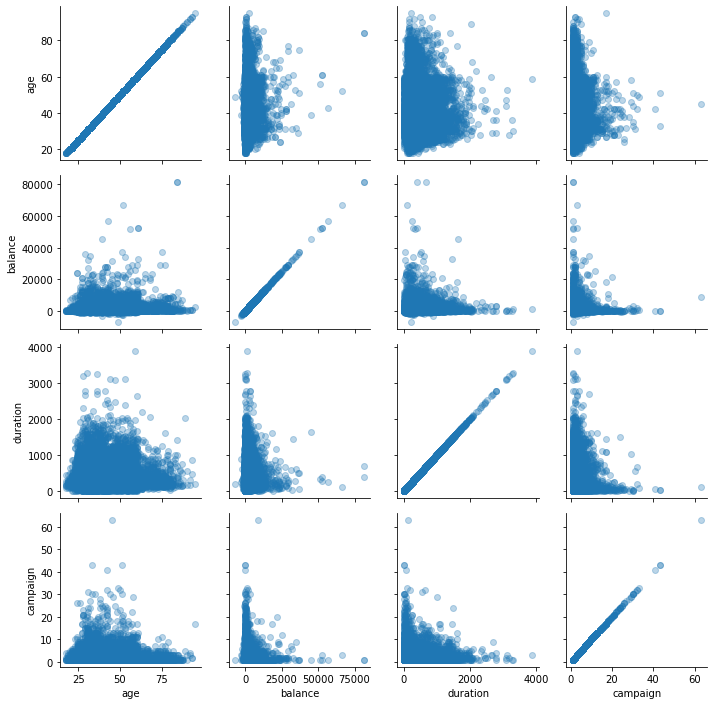

In [14]:
#scatterplot for the numeric variables
g = sb.PairGrid(data = camp_data)
g.map(plt.scatter, alpha = 0.3);

As expected, it is hard that any of these variables have effect or relation on the other. For example, balance can not have a signficant impact on the duration of contact, neither can age have effect on number of times contacted per person. The charts supports my initial thoughts.


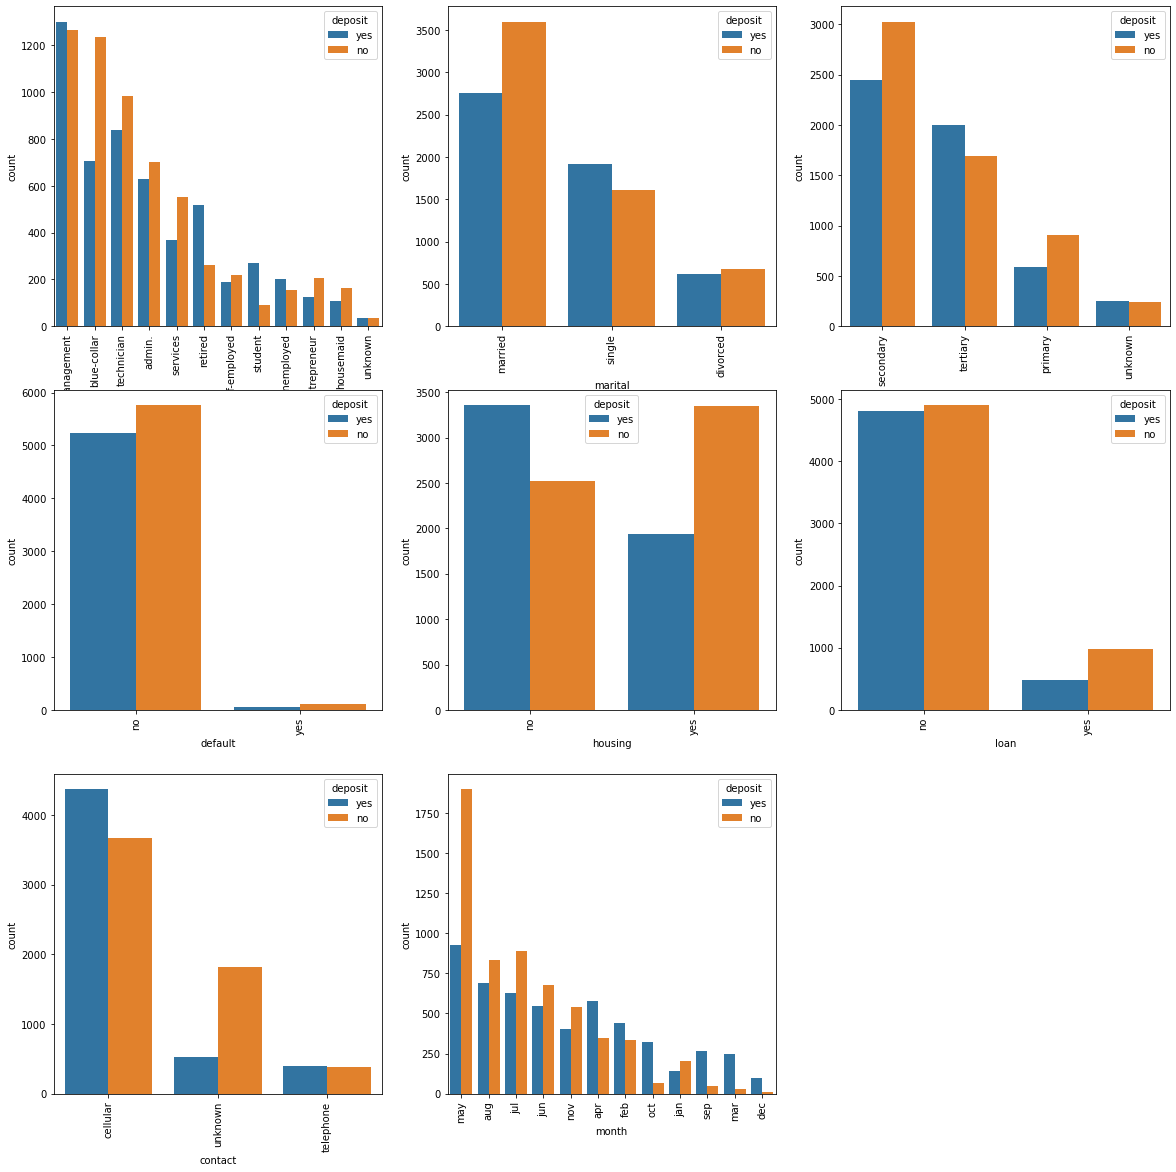

In [15]:
#Exploring Catigorical variables effect on deposits

cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

i = 1
plt.figure(figsize = (20,20))
for col in cols:
    plt.subplot(3,3,i)
    freq = camp_data[col].value_counts()
    order = freq.index
    sb.countplot(data = camp_data, x = col, hue = 'deposit', order = order)
    plt.xticks(rotation = 90);
    i = i+1

By looking at the charts above we can see some interesting findings: 
- Jobs like blue-collar and services are less likely to make a deposit.
- Married people are less likely to make deposits.
- People who have housing loans are shown to be a less favorable target persona.
- People using cellular showed more positive responses.

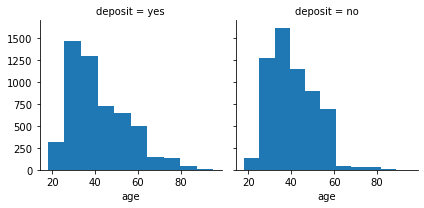

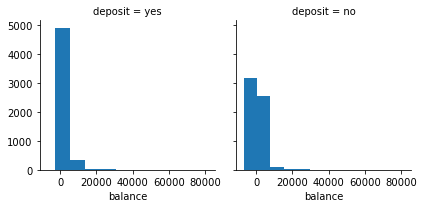

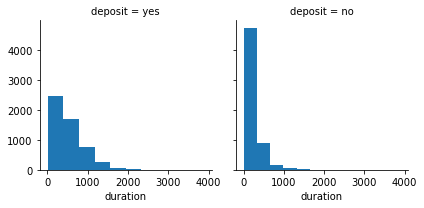

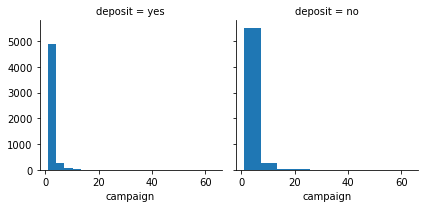

In [16]:
#Histograms of Quantitative variables deposit differences

cols = ['age', 'balance', 'duration', 'campaign']

for col in cols:
    g = sb.FacetGrid(data = camp_data, col = 'deposit', col_wrap = 2)
    g.map(plt.hist, col)

The plotting above seems to be promising but I need further assurance, so I am replotting below to see if there is siginficane impact. 

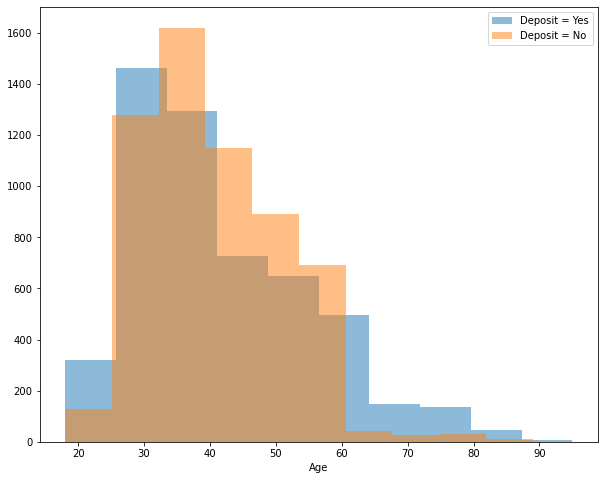

In [17]:
plt.figure(figsize = (10,8))
plt.hist(data = camp_data[camp_data['deposit'] == 'yes'], x = 'age', alpha = 0.5, label = 'Deposit = Yes')
plt.hist(data = camp_data[camp_data['deposit'] == 'no'], x = 'age', alpha = 0.5, label = 'Deposit = No')
plt.xlabel('Age')
plt.legend();

Here we can see that people below approximately 35 and above 60 are more likely to subscribe to term deposits.

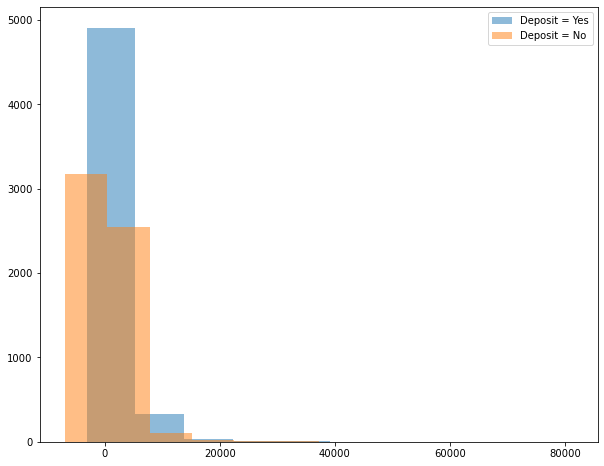

In [18]:
plt.figure(figsize = (10,8))
plt.hist(data = camp_data[camp_data['deposit'] == 'yes'], x = 'balance', alpha = 0.5, label = 'Deposit = Yes')
plt.hist(data = camp_data[camp_data['deposit'] == 'no'], x = 'balance', alpha = 0.5, label = 'Deposit = No')
plt.legend();

We can see that people with more balance in their accounts are a more favorable target.

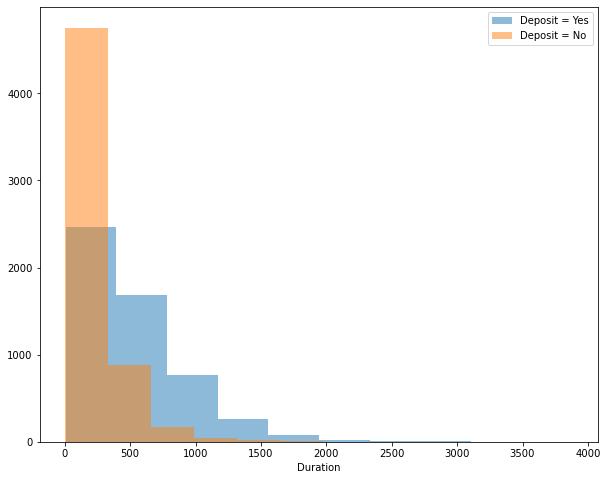

In [19]:
plt.figure(figsize = (10,8))
plt.hist(data = camp_data[camp_data['deposit'] == 'yes'], x = 'duration', alpha = 0.5, label = 'Deposit = Yes')
plt.hist(data = camp_data[camp_data['deposit'] == 'no'], x = 'duration', alpha = 0.5, label = 'Deposit = No')
plt.xlabel('Duration')
plt.legend();

The graph shows that the longer duration a client takes the more likely he is to subscribe

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest affect whether a user subscribes or not.

I found some interesting insights that I will be happy to report to the matketing team to improve the future campaigns. 
Students and retired are more likely to subscribe to term deposits. Jobs like blue-collar and services are not a favorable target. 
Married people are less likely to make deposits. People who have large balance in their account and consume more time in contact tend to subscribe more often.
People who are younger than 35 and older than 60 tend to subscribe more often as well.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I was kind of surprised to notice that the time a client takes have influence on wheter he accepts or refuses the offer. I might say that when a client takes more time; it means he is really considering the offer.

<h2>Multivariate Exploration</h2>


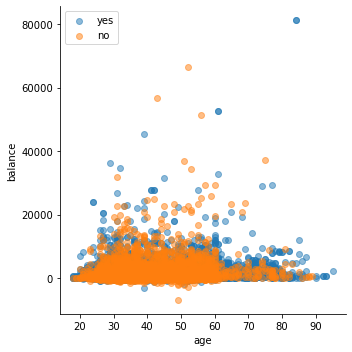

In [20]:
g = sb.FacetGrid(data = camp_data, hue = 'deposit', height = 5)
g.map(plt.scatter,'age','balance', alpha = 0.5)
plt.legend();

The graph shows that younger and older customer who have large balance are really good potential subscribers to term deposits.

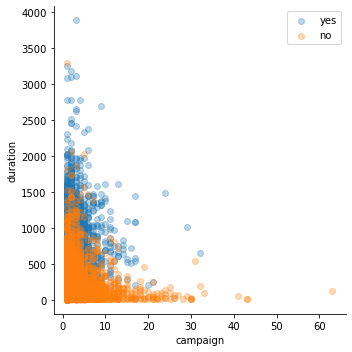

In [23]:
g = sb.FacetGrid(data = camp_data, hue = 'deposit', height = 5)
g.map(plt.scatter,'campaign','duration', alpha = 0.3)
plt.legend();

We can conclude from this graph that when a client is contacted fewer number of times and longer durations; he is very likely to accept the offer and subscribe to term deposit.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The plots supported my observations about the effect of age and balance on the client's decision. We see that younger people and older people with hight balance are more likely to be a subscribers.
We also saw some interesting fact about the data. Peole who are contacted fewer number of times and consume more duration of time during these contacts are very potential subscribers.